In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple,List
from collections import Counter

In [3]:
file_name = "ld_clump_assoc.txt"
data = pd.read_csv(file_name,delimiter = "\t")

In [10]:
# plot function prototype

# manhattan plot prototype 

def manhattan_plot(data:pd.DataFrame, # meqtl data
                   epi_pos: str = "SNP pos", # x-coordinate for manhattan plot (CpG/SNP pos,chr)
                   sum_stat:str = "Beta", # summary statistics to plot (P,Beta,FDR)
                   sum_stat_lim:int = 0, # minimum summary statistics filter 
                   sum_stat_error:str = None, # summary statistics error term (SE) to plot as a feature (currently size)
                   assoc_type:str = "Cis/Trans",# association category (Cis/Trans) to plot as as feature (currently style)
                   cpg_filter:str = [],
                   x_range:Tuple[int,int] = (0,0)
                  )-> None:
    
    min_pos, max_pos = x_range # destructure x-range
    
    
    if min_pos == 0 and max_pos == 0: # if range not supplied
        min_pos,max_pos = data[epi_pos].min(),data[epi_pos].max() # set xaxis range to epi_pos range
    
    data = data[abs(data[sum_stat])>=sum_stat_lim] # filter values less than summary stat minimum (abs used for negative beta values)
    
    if len(cpg_filter)>0: # if certain cps are of interest
        
        data = data[data["CpG"].isin(cpg_filter)] # filter the input cpgs
        plot = sns.scatterplot(data=data, # plot
                               x=epi_pos,
                               y=sum_stat,
                               size=sum_stat_error,
                               hue="CpG",
                               style=assoc_type)
    else:
        plot = sns.scatterplot(data=data, # plot
                               x=epi_pos,
                               y=sum_stat,
                               size=sum_stat_error,
                               style=assoc_type)
    
    plot.set(xlim=(min_pos,max_pos)) # set xaxis limits
    plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1) # move legend outside plot  
    return plot  # show plot


# box-plot

def box_plot(data:pd.DataFrame,assoc_type:str)->int:
    

    return 0 


In [5]:
# some parameters for examples
top_n = 10 
cpg_ids = [i[0] for i in Counter(data['CpG'].values).most_common()[:top_n]] # cpgs with highest number of snps  
snp_ids =  [i[0] for i in Counter(data['Top SNP'].values).most_common()[:top_n]]
epi_pos = "SNP pos" 
sum_stat = "Beta"
sum_stat_min = 0
sum_stat_error = "SE"
assoc_type = "Cis/Trans"
x_range = (0.5e7,1.5e7)


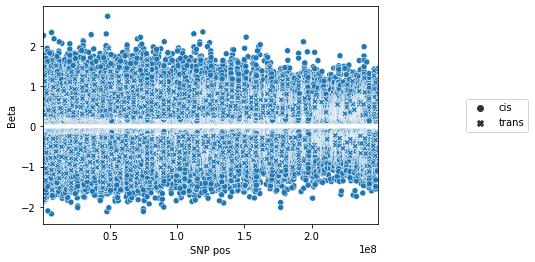

In [6]:
manhattan_plot(data)

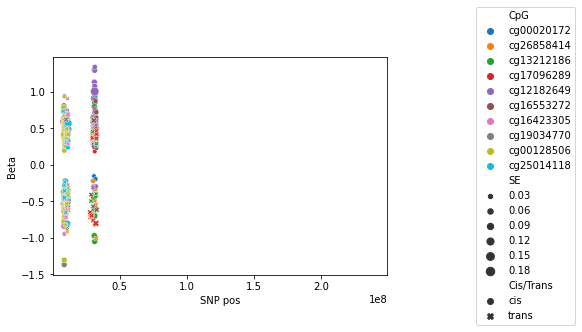

In [7]:
manhattan_plot(data,
               epi_pos,
               sum_stat,
               sum_stat_min,
               sum_stat_error,
               assoc_type,
               cpg_ids)

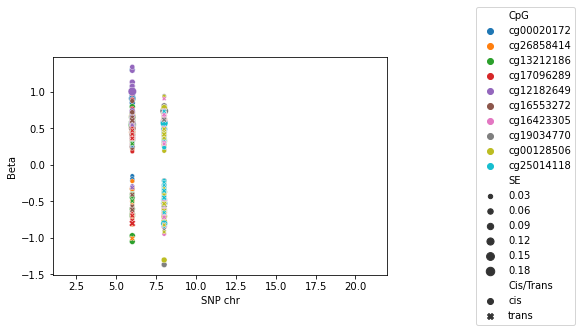

In [61]:
manhattan_plot(data,
               "SNP chr",
               sum_stat,
               sum_stat_min,
               sum_stat_error,
               assoc_type,
               cpg_ids)

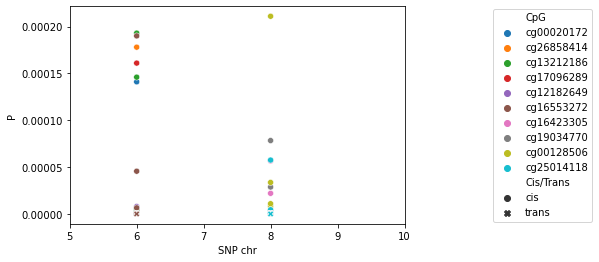

In [133]:
a = manhattan_plot(data,
               "SNP chr",
               "P",
               sum_stat_min,
               None,
               assoc_type,
               cpg_ids,
               (5,10))
            
fig =a.get_figure()
fig.savefig("out.png",dpi=300,facecolor='white', edgecolor='white',bbox_inches='tight') 
 


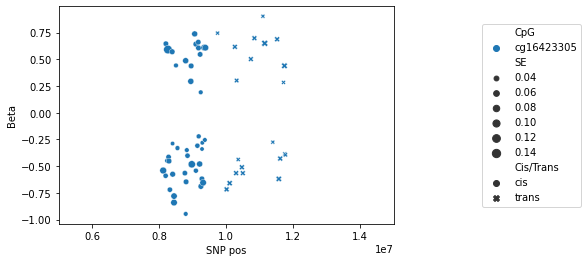

In [16]:
a = manhattan_plot(data,
               epi_pos,
               sum_stat,
               sum_stat_min,
               sum_stat_error,
               assoc_type,
               ["cg16423305"],
                x_range)
fig =a.get_figure()
fig.savefig("out.png",dpi=300,facecolor='white', edgecolor='white',bbox_inches='tight') 


/var/folders/qm/j16hfspx3wqgdhdmm1rk8q_80000gp/T/ipykernel_27620/2927059311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['abs_beta'] = abs(filtered_data['Beta'])
/var/folders/qm/j16hfspx3wqgdhdmm1rk8q_80000gp/T/ipykernel_27620/2927059311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['dist'] = filtered_data['CpG pos'] - filtered_data['SNP pos']


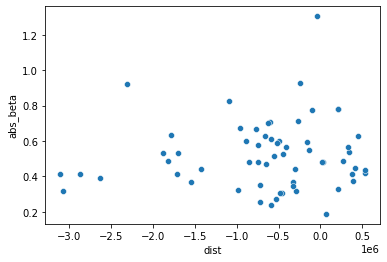

In [44]:
most_common_CpG = Counter(data['CpG'].values).most_common()[1][0]
filtered_data = data[data['CpG'] == most_common_CpG]
filtered_data['abs_beta'] = abs(filtered_data['Beta'])
filtered_data['dist'] = filtered_data['CpG pos'] - filtered_data['SNP pos']
plot = sns.scatterplot(data=filtered_data, # plot
                               x='dist',
                               y='abs_beta')

fig =plot.get_figure()
fig.savefig("distance.png",dpi=300,facecolor='white', edgecolor='white',bbox_inches='tight') 

In [124]:
most_common_CpGs = [i[0] for i in Counter(data['CpG'].values).most_common()[0:40]]
most_common_CpGs.sort(reverse=True)
data_heat = data[data['CpG'].isin(most_common_CpGs)]
data_heat['abs_beta'] = abs(data_heat['Beta'])
matrix_data = pd.DataFrame()
index = data_heat['SNP pos'].unique()
index.sort()
matrix_data['SNP'] = index
matrix_data.set_index('SNP',inplace=True)
for i in most_common_CpGs:
    sample_data = data_heat[data_heat['CpG'] == i]
    heat_values = []
    for j in index:
        if len(sample_data[sample_data['SNP pos']==j]) == 0:
            heat_values.append(0)
        else:
            heat_values.append(sample_data[sample_data['SNP pos']==j]['abs_beta'].values[0])
    matrix_data[i] = heat_values

/var/folders/qm/j16hfspx3wqgdhdmm1rk8q_80000gp/T/ipykernel_27620/2932226341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_heat['abs_beta'] = abs(data_heat['Beta'])


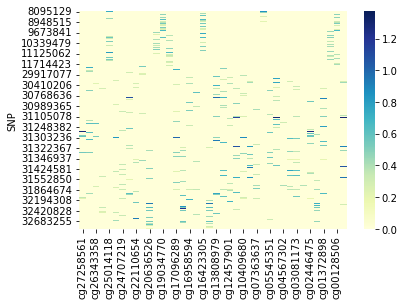

In [125]:
a = sns.heatmap(matrix_data,cmap="YlGnBu")
fig =a.get_figure()
fig.savefig("heat.png",dpi=300,facecolor='white', edgecolor='white',bbox_inches='tight') 

In [75]:
 sample_data = data[data['CpG'] == most_common_CpGs[0]]

In [82]:
sample_data[sample_data['SNP pos']==8113351]['Beta'].values[0]

-0.541481

In [109]:
sample_data = data_heat[data_heat['CpG'] == i]

In [95]:
data_heat

,CpG,Top SNP,LD clump,CpG chr,CpG pos,SNP chr,SNP pos,A1,A2,MAF,Beta,SE,P,FDR,N,n,Effects,Cis/Trans,abs_beta
268869,cg00020172,6:30055930_GA_G,6:29910910_C_T,6,31050373,6,30055930,GA,G,0.131,-0.220492,0.045152,1.060000e-06,0.000782,2,1742,--???,cis,0.220492
268870,cg00020172,6:30077135_C_A,6:30112981_TA_T,6,31050373,6,30077135,C,A,0.150,0.338210,0.041172,2.240000e-16,0.000000,3,1939,+++??,cis,0.338210
268871,cg00020172,6:30138645_G_A,6:30205643_C_T,6,31050373,6,30138645,G,A,0.086,0.647893,0.062947,8.160000e-25,0.000000,2,1531,?+?+?,cis,0.647893
268872,cg00020172,6:30222597_G_A,6:30059592_C_G,6,31050373,6,30222597,G,A,0.162,0.375299,0.046999,1.470000e-15,0.000000,2,1531,?+?+?,cis,0.375299
268873,cg00020172,6:30276679_CT_C,6:30090337_G_A,6,31050373,6,30276679,CT,C,0.367,-0.297823,0.031822,8.550000e-21,0.000000,3,1939,---??,cis,0.297823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790423,cg25014118,8:8506271_CAGAG_C,8:8324686_C_T,8,10948462,8,8506271,CAGAG,C,0.269,-0.281267,0.035781,4.000000e-15,0.000003,2,1742,--???,trans,0.281267
790424,cg25014118,8:8768859_A_T,8:8768859_A_T,8,10948462,8,8768859,A,T,0.221,-0.451721,0.056801,1.920000e-15,0.000002,2,1531,?-?-?,trans,0.451721
790425,cg25014118,8:8937264_T_G,8:8937264_T_G,8,10948462,8,8937264,T,G,0.488,-0.357872,0.052754,1.210000e-11,0.000805,2,1545,?--??,trans,0.357872
790426,cg25014118,8:9095719_T_A,8:9095719_T_A,8,10948462,8,9095719,T,A,0.445,-0.239637,0.032290,1.210000e-13,0.000032,2,1742,--???,trans,0.239637


In [97]:
data_heat

,CpG,Top SNP,LD clump,CpG chr,CpG pos,SNP chr,SNP pos,A1,A2,MAF,Beta,SE,P,FDR,N,n,Effects,Cis/Trans
268869,cg00020172,6:30055930_GA_G,6:29910910_C_T,6,31050373,6,30055930,GA,G,0.131,-0.220492,0.045152,1.060000e-06,0.000782,2,1742,--???,cis
268870,cg00020172,6:30077135_C_A,6:30112981_TA_T,6,31050373,6,30077135,C,A,0.150,0.338210,0.041172,2.240000e-16,0.000000,3,1939,+++??,cis
268871,cg00020172,6:30138645_G_A,6:30205643_C_T,6,31050373,6,30138645,G,A,0.086,0.647893,0.062947,8.160000e-25,0.000000,2,1531,?+?+?,cis
268872,cg00020172,6:30222597_G_A,6:30059592_C_G,6,31050373,6,30222597,G,A,0.162,0.375299,0.046999,1.470000e-15,0.000000,2,1531,?+?+?,cis
268873,cg00020172,6:30276679_CT_C,6:30090337_G_A,6,31050373,6,30276679,CT,C,0.367,-0.297823,0.031822,8.550000e-21,0.000000,3,1939,---??,cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790423,cg25014118,8:8506271_CAGAG_C,8:8324686_C_T,8,10948462,8,8506271,CAGAG,C,0.269,-0.281267,0.035781,4.000000e-15,0.000003,2,1742,--???,trans
790424,cg25014118,8:8768859_A_T,8:8768859_A_T,8,10948462,8,8768859,A,T,0.221,-0.451721,0.056801,1.920000e-15,0.000002,2,1531,?-?-?,trans
790425,cg25014118,8:8937264_T_G,8:8937264_T_G,8,10948462,8,8937264,T,G,0.488,-0.357872,0.052754,1.210000e-11,0.000805,2,1545,?--??,trans
790426,cg25014118,8:9095719_T_A,8:9095719_T_A,8,10948462,8,9095719,T,A,0.445,-0.239637,0.032290,1.210000e-13,0.000032,2,1742,--???,trans


In [113]:
most_common_CpGs.sort()
most_common_CpGs

['cg00020172',
 'cg00128506',
 'cg05545351',
 'cg12182649',
 'cg13212186',
 'cg13808979',
 'cg14704780',
 'cg16423305',
 'cg16553272',
 'cg16958594',
 'cg17096289',
 'cg18111489',
 'cg19034770',
 'cg19675496',
 'cg20636526',
 'cg20802826',
 'cg22110654',
 'cg25014118',
 'cg26858414',
 'cg27258561']